<a href="https://colab.research.google.com/github/FabioVCoelho/Univali/blob/master/ProcessamentoDeImagem/Convolu%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolução genérica

Operação de convolução é:
- A soma dos resultados da multiplicação de cada elemento da
matriz com a região da imagem sob a mesma;
- A subseqüente substituição do valor do pixel sobre o qual a matriz
foi aplicada por este resultado

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
 
def print_img(img):
  #Display the image
  cv2_imshow(img)
  #key binding function
  cv2.waitKey(0)
  #Destroyed all window we created earlier.
  cv2.destroyAllWindows()
 
def gray_tone(array):
  return (array[0] * 0.299 + array[1] * 0.587 + array[2] * 0.114)
 
def image_cinza(imagem):
  new_img = imagem
  for index_img,img_array in enumerate(imagem):
    for index_pixel,pixel in enumerate(img_array):
      new_img[index_img][index_pixel] = gray_tone(pixel)
  return new_img

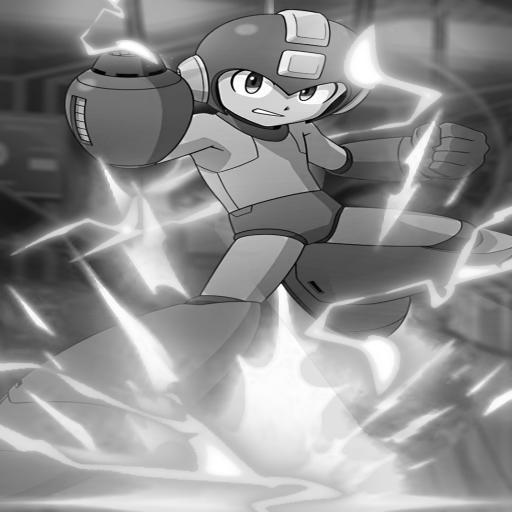

In [3]:
imagem = image_cinza(cv2.imread('/content/megaman.png'))
print_img(imagem)

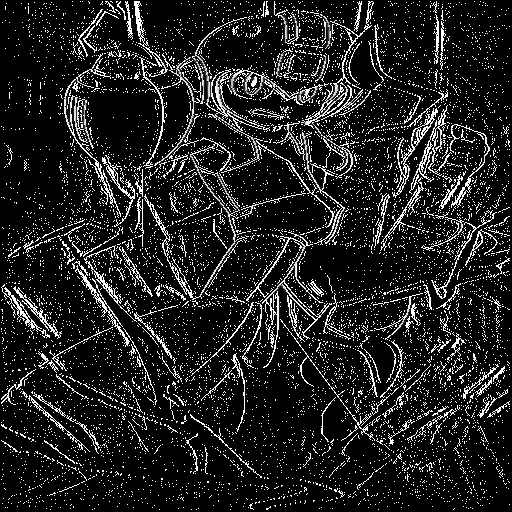

In [38]:
imagem = image_cinza(cv2.imread('/content/megaman.png'))
kernel = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
blank_image = np.zeros((len(imagem),len(imagem[0]),3), np.uint8)
central_point_kernel = len(kernel)//2
for index_img in range(0,len(imagem) - len(kernel)):
  for index_pixel in range(0,len(imagem[0]) - len(kernel)):
    sum = 0
    for kernel_array in range(0,len(kernel)):
      for kernel_pixel in range(0,len(kernel[0])):
        sum += imagem[index_img][index_pixel + kernel_array][kernel_pixel] * kernel[kernel_array][kernel_pixel]
    blank_image[index_img - central_point_kernel + kernel_array,index_pixel - central_point_kernel + kernel_pixel] = sum/6

print_img(blank_image)

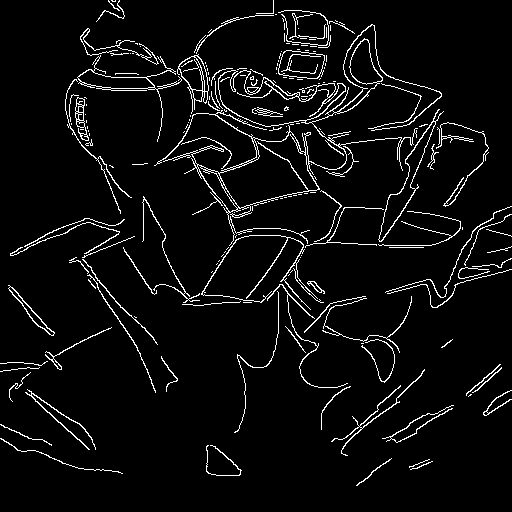

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('megaman.png',0)
edges = cv2.Canny(img,100,200)

print_img(edges)

Adição

In [8]:
def limiar(pixel):
  if (pixel > 100):
    return 255
  return 0

In [9]:
def img_limiar(image):
  new_img_limiar = image
  for index_img,img_array in enumerate(new_img_limiar):
    for index_pixel,pixel in enumerate(img_array):
      for rgb_index,rgb in enumerate(pixel):
        new_img_limiar[index_img][index_pixel] = limiar(rgb)
  return new_img_limiar

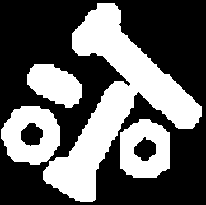

In [26]:
imagem = img_limiar(image_cinza(cv2.imread('/content/ImageSlide.png')))
blank_image = np.zeros((len(imagem),len(imagem[0]),3), np.uint8)
kernel = np.ones((5,5), np.uint8)
central_point_kernel = len(kernel)//2
for index_img in range(0,len(imagem) - len(kernel)):
  for index_pixel in range(0,len(imagem[0]) - len(kernel)):
    array_ponto_central = imagem[index_img][index_pixel]
    if array_ponto_central[0] > 0:                             # Se o ponto central da imagem for > 0
      for kernel_array in range(0,len(kernel)):                # Para cada array do kernel
        for kernel_pixel in range(0,len(kernel[0])):           # Para cada valor do array do kernel
          if (kernel[kernel_array][kernel_pixel] > 0):         # Se for maior que zero
            # Insira na nova imagem o valor do ponto central da imagem.
            blank_image[index_img - central_point_kernel + kernel_array,index_pixel - central_point_kernel + kernel_pixel] = array_ponto_central
print_img(blank_image)

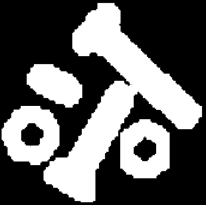

In [27]:
img = image_cinza(cv2.imread('/content/ImageSlide.png'))
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(img, kernel, iterations=1)
print_img(img_dilation)